Before you turn this problem set in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). Your code should run from top to bottom with no errors. Failure to do this will result in loss of points.

You should not use `install.packages()` anywhere. You may assume that we have already installed all the packages needed to run your code.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE" and delete the `stop()` functions, as well as your name and collaborators below:

In [79]:
NAME = "aayushap"  # your uniqname 
COLLABORATORS = c("pjmerica", "kaspersj", "sohumm")  # vector of uniqnames of your collaborators, if any
## IMPORTANT: you must also have set your group on Canvas. This is only used as a backup.

---

In [80]:
library(tidyverse)
library(nycflights13)

# STATS 306
## Problem Set 4: EDA & Table Joins
Each question is worth two points, for a total of 20.

#### Problem 1
Suppose you are given the following whisker plot for $n=200$ samples of a random variable $x$:
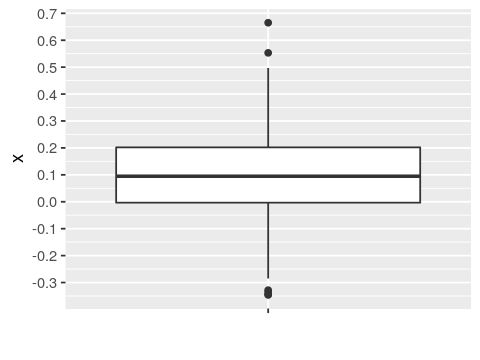
1. About how many samples were between .1 and .2?
2. The upper whisker extends to about $x=0.5$. Explain how this is calculated.

#### Problem 2
The most common model of airplane flown by United Airlines is the 737-824; there are 122 instances of this type of aircraft in the data. What is the most common airplane model flown by Delta airlines? Store your answer in a variable called `model2`.

In [85]:
model2 <- left_join(flights, airlines, by = "carrier") %>% left_join(planes, by = "tailnum") %>% filter(carrier == "DL") %>% 
group_by(model) %>% summarize(bigballer = n()) %>% arrange(desc(bigballer)) %>% filter(row_number() == 1) %>% 
select(model) %>% as.character
model2


[1] "MD-88"

In [59]:
stopifnot(exists("model2"))

#### Problem 3
In July there were 31 departures from JFK destined for somewhere tropical. How many were there in December? Store your answer in a variable called `lga3`.

In [86]:
lga3 = flights %>% left_join(airports, by = c("dest" = "faa")) %>% filter(origin == "JFK") %>% filter(month == 12) %>% 
filter(lat < 23.5 & lat > -23.5) %>% nrow()
lga3

[1] 28

In [61]:
stopifnot(exists('lga3'))

#### Problem 4
The *odds* of a binary event equals the probability of occurrence divided by the probability of non-occurrence.
- The odds of flipping a fair coin and seeing heads are $1:1$, i.e. one.
- The odds that a randomly chosen day of the week is a Saturday are $\frac{1/7}{6/7}=1:6 = .167$.

There were 27261 United Airlines flights which experienced a departure delay:


In [87]:
flights %>% filter(carrier == "UA") %>% count(dep_delay > 0)

dep_delay > 0,n
FALSE,30718
TRUE,27261
NA,686


Of the 27261 flights that experienced a departure delay, and after dropping flights with missing `dep_delay`, it was also the case that the *immediately preceding* (in chronological order, with ties broken by tail number) United Airlines flight was also delayed. Hence, the odds of experiencing a delay given that the previous flight was also delayed are $15246/(27261 - 15246)=1.27$.

Using the same criteria, what are the odds that a Delta Airlines flight is delayed given that the previous Delta flight was also delayed? Store your answer in a random variable called `odds4`. (We will check your to two decimal places.)

In [93]:
DLdelayed <- flights %>% filter(carrier == 'DL') %>% arrange(year,month,day, sched_dep_time) %>% mutate(lag_dep_delay = lag(dep_delay)) %>%
    filter(lag_dep_delay >0) %>% print(nrow(DLdelayed))
DLdelayed %>% filter(carrier == 'DL') %>% filter(dep_delay > 0 ) %>% summarize(n=n())
odds4 <- 7302 / (nrow(DLdelayed) - 7302)  
print(odds4)

# A tibble: 15,240 x 20
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
 1  2013     1     1      752            755        -3     1041           1059
 2  2013     1     1      857            905        -8     1107           1120
 3  2013     1     1     1113           1115        -2     1318           1315
 4  2013     1     1     1325           1330        -5     1606           1605
 5  2013     1     1     1440           1440         0     1658           1643
 6  2013     1     1     1511           1515        -4     1657           1700
 7  2013     1     1     1538           1540        -2     1827           1851
 8  2013     1     1     1621           1548        33     1904           1830
 9  2013     1     1     1543           1550        -7     1933           1925
10  2013     1     1     1554           1559        -5     1857           1841
# ... with 15,230 more rows,

n
7302


[1] 0.9198791


In [43]:
stopifnot(exists("odds4"))

#### Problem 5
How many flights were destined for airports with a one-word name? Store your integer answer in a variable called `oneword5`. (*Hint*: consider `str_detect`.)

In [63]:
require(stringr)
oneword5 <- flights %>% left_join(airports, by=c("dest" = "faa")) %>% filter(!str_detect(name, " ")) %>% nrow() %>% head
oneword5


[1] 190

In [64]:
stopifnot(exists("oneword5"))

#### Problem 6
The average city gas mileage of the Audi A4 (across all different model options) in 1999 and 2008 was:

In [46]:
mpg %>% filter(manufacturer == "audi", model == "a4") %>% group_by(year) %>% 
        summarize(avg_cty = mean(cty)) %>% print

# A tibble: 2 x 2
   year avg_cty
  <int>   <dbl>
1  1999    18.2
2  2008    19.7


Hence, average city gas mileage for this vehicle *improved* between 1999 and 2008.

For how many models was average city gas mileage *lower* in 1999 than in 2008? Store your answer as an integer in a variable called `decreased6`.

In [65]:
decreased6 <- mpg %>% group_by(model, year) %>% summarize(avg_city = mean(cty)) %>% arrange(model, desc(avg_city)) %>%
slice(seq(2, 76, 2)) %>% filter(year==1999)  %>% nrow()
decreased6

[1] 23

In [48]:
stopifnot(exists("decreased6"))

### Football data
The next few questions use a new data set. The file `cfb.RData` contains a table called `cfb` with information on 5353 college football games played since 2011. (More information about this data can be found [here](http://www.seldomusedreserve.com/?page_id=8805).)

In [66]:
load('cfb.RData')
print(cfb)

# A tibble: 5,353 x 52
    Year  Game Count `Conf Game` Week  Winning `Winning Confer… `Winning H/A/N`
   <int> <int> <int> <chr>       <chr> <chr>   <chr>            <chr>          
 1  2011     1     1 Y           1     FIU     Sun Belt         H              
 2  2011     2     1 N           1     Wiscon… Big 10           H              
 3  2011     3     1 N           1     Missis… SEC              A              
 4  2011     4     1 N           1     Syracu… Big East         H              
 5  2011     5     1 N           1     Bowlin… MAC              A              
 6  2011     6     1 N           1     Kentuc… SEC              N              
 7  2011     7     1 N           1     Baylor  Big 12           H              
 8  2011     8     1 N           1     Ohio S… Big 10           H              
 9  2011     9     1 N           1     Missou… Big 12           H              
10  2011    10     1 N           1     Auburn  SEC              H              
# ... with 5,343 

#### Problem 7
Certain conferences have a reputation for being higher scoring. Investigate this by restricting to conference games and producing a box-and-whisker plot that shows the distribution of the winning point spreads by conference. The plot should be rotated 90 degrees so that the conference names are legible, and the conferences should be in descending order of the median point spread (i.e. conference with the highest median point spread is at the top of the plot.) 

(Note: Your plot may reveal a data entry error in this dataset. If so, correct it before producing the final plot.)

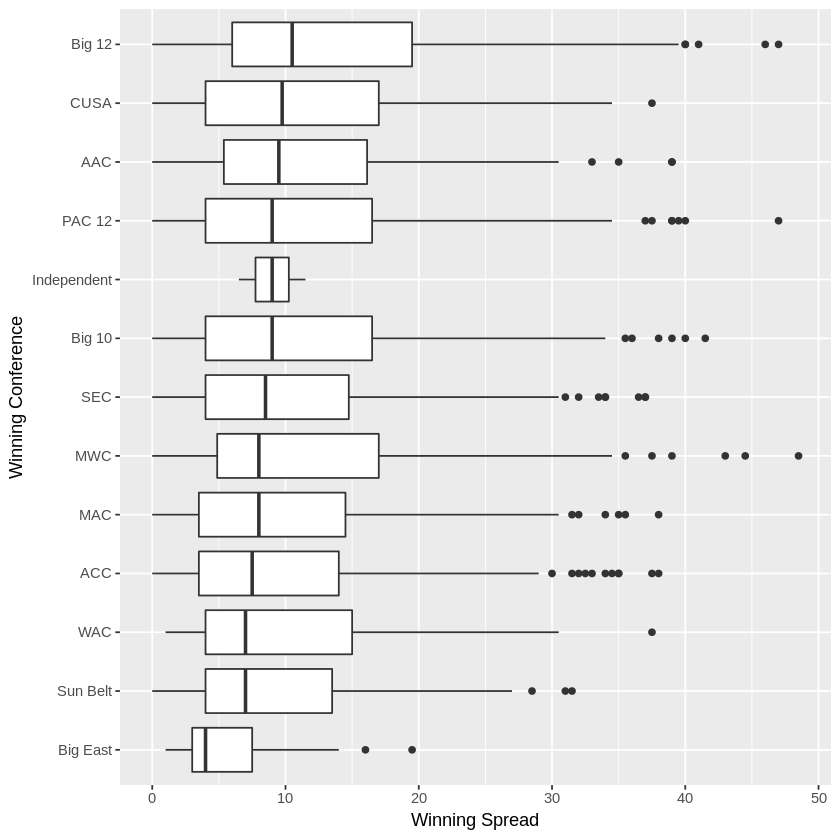

In [67]:
Big_winners = cfb %>% mutate(`Winning Conference` = ifelse(`Winning Conference` == "Big12", "Big 12", `Winning Conference`)) %>% group_by(`Winning Conference`) %>% filter(`Conf Game` == "Y") %>%
filter(!is.na(`Winning Spread`))

ggplot(data = Big_winners, mapping = aes(x = reorder(`Winning Conference`, `Winning Spread`, median), y = `Winning Spread`)) +
geom_boxplot() + coord_flip() + xlab("Winning Conference")


#### Problem 8
Filter `cfb` by again restricting to conference games, and then to the four largest conferences in terms of total games played. For each conference, plot a frequency polygon of the winning team's total yardage. 
- Each conference should have a different colored line. 
- To facilitate comparison between the different conferences, each frequency polygon should be normalized to have unit area. 
- Experiment with a few values of the bin size to find a setting that provides an acceptable tradeoff between smoothness and detail.

Selecting by tyard


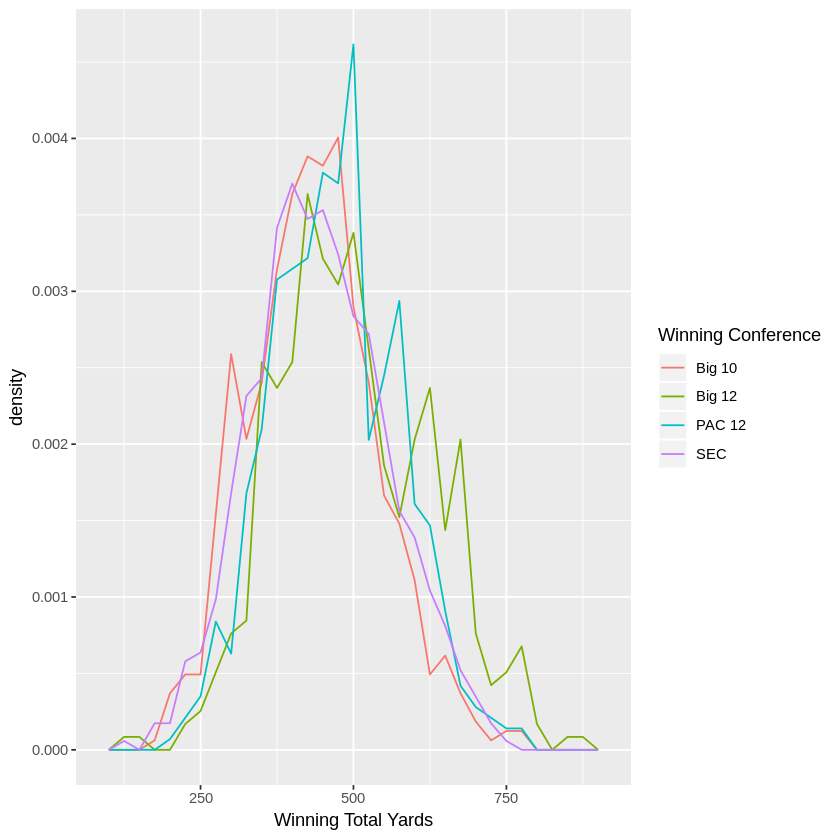

In [84]:
tbl2 = cfb %>% filter(`Conf Game` == 'Y') %>% group_by(`Winning Conference`) %>% 
        summarize(n = n(), tyard = sum(`Winning Total Yards`)) %>% top_n(.,4)
lonzoisgoat = cfb %>% filter(`Winning Conference` == tbl2$`Winning Conference`[1] |
                              `Winning Conference` == tbl2$`Winning Conference`[2] |
                              `Winning Conference` == tbl2$`Winning Conference`[3] |
                             `Winning Conference` == tbl2$`Winning Conference`[4] )
lonzoisgoat %>% group_by(`Winning Conference`) %>% ggplot(mapping = aes(x=`Winning Total Yards`, y=..density..)) +
        geom_freqpoly(mapping = aes(color = `Winning Conference`), binwidth = 25)


#### Problem 9
Compute a 2D density estimate (contour plot) of the joint distribution of Michigan's passing and rushing yardage across every  University of Michigan game in `cfb`. Give your plot appropirate axis labels and a title.

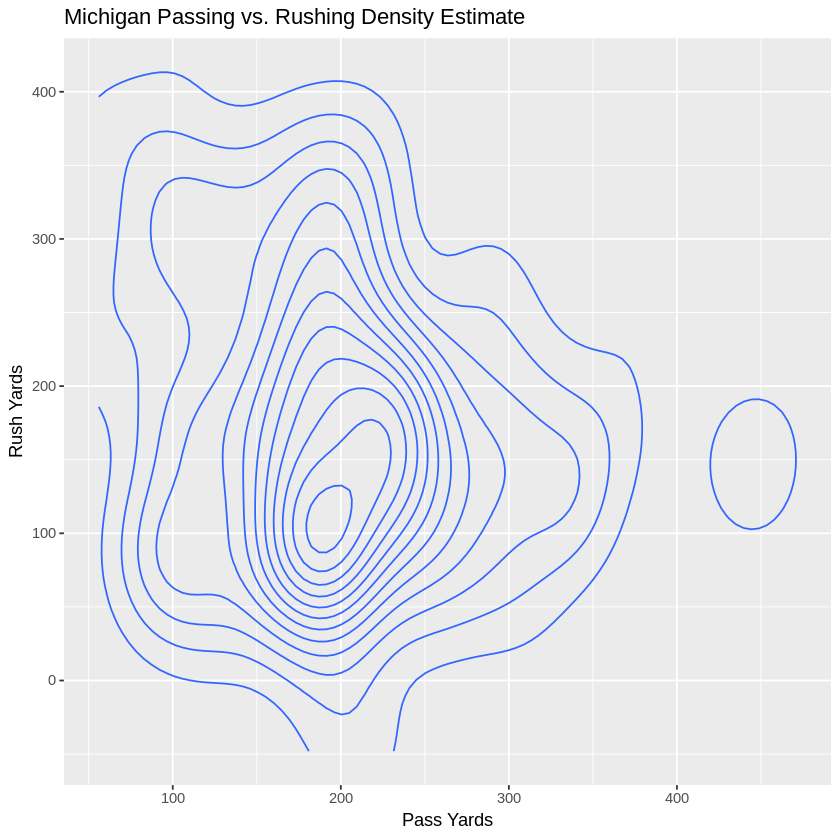

In [52]:
Michdata = cfb %>% filter(Winning == "Michigan" | Losing == "Michigan")

ggplot(data = Michdata, mapping = aes(x = ifelse(Winning == "Michigan", `Winning Pass Yards`, `Losing Pass Yards`), y = ifelse(Winning == "Michigan", `Winning Rush Yards`, `Losing Rush Yards`), stat = "identity")) +
geom_density_2d() +  labs(x = "Pass Yards", y = "Rush Yards") + ggtitle("Michigan Passing vs. Rushing Density Estimate")


#### Problem 10
Compute the yearly winning percentage for Michigan and Ohio State and use it to generate the following line plot:

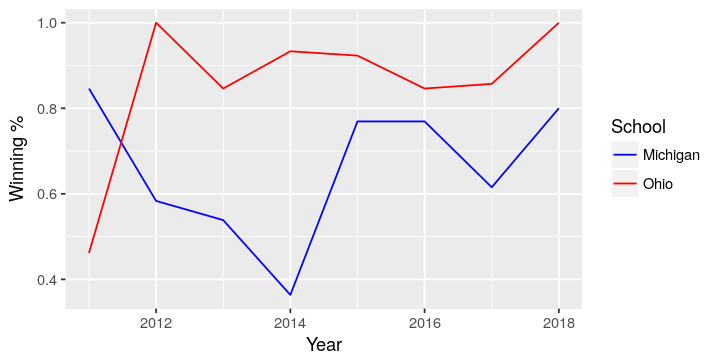

The plot should have a <span style="color:blue">blue</span> line for Michigan and a <span style="color:red">red</span> line for Ohio, and as many $x$ values as there are years in the data. (Note: I have been told this sort of graphic causes Michigan fans deep anguish. Feel free to `annotate()` your plot accordingly if so.)

Joining, by = "Year"


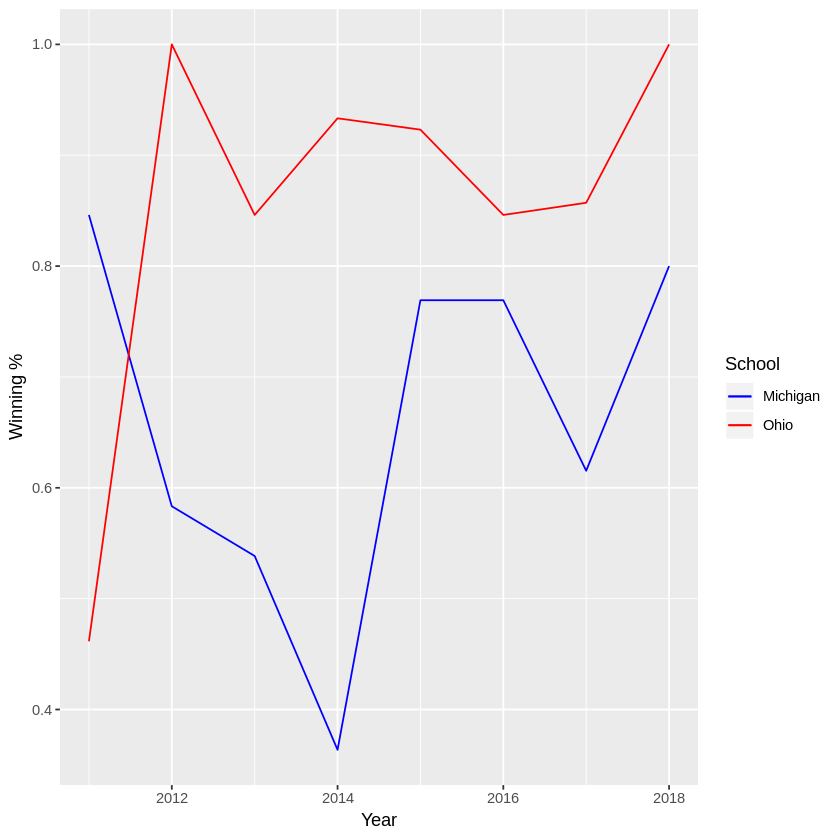

In [100]:
mich_data = cfb %>% filter(Winning == "Michigan" | Losing == "Michigan") %>% group_by(Year) %>%
    summarize(mich_percent = sum(Winning == "Michigan")/n())

osu_data = cfb %>% filter(Winning == "Ohio State" | Losing == "Ohio State") %>% group_by(Year) %>%
    summarize(osu_percent = sum(Winning == "Ohio State")/n())
joint <- left_join(mich_data, osu_data)
joint %>% ggplot() + geom_line(aes(x = Year,y = mich_percent, color = "Michigan")) +
    geom_line(aes(x = Year, y=osu_percent, color = "Ohio")) + ylab("Winning %") + scale_color_manual(name="School", values =c("blue", "red"))

#### Problem 11 (challenge problem)
<small>Worth two points extra credit. No hints given!</small>

Let's say a flight departed under "rainy conditions" if, at the departure airport in the 24 hours leading up to (and including) the flight's departure time,
1. there was at least a quarter of an inch of (cumulative) precipitation, and 
2. the average temperature during that period was above 40 degrees Fahrenheit. 

How many flights departed under rainy conditions on of the ten Federal holidays in 2013? (Drop any flights for which this cannot be computed due to missing data.) Store your answer in a variable called `rainy_holiday_departures`.

In [95]:
 rainy_holiday_departures = flights %>% left_join(weather) %>% filter(precip >=.25) %>% filter(!is.na(dep_time)) %>% filter(temp >= 40) %>%
filter((month == 1 & day == 1) | (month ==1 & day == 21) | (month == 2 & day == 18) 
       | (month == 5 & day == 27) | (month == 7 & day == 4) | (month == 9 & day == 2) |
       (month == 10 & day == 14) | (month == 11 & day == 11) | (month == 11 & day == 29) |
       (month == 12 & day ==25)) %>% nrow() %>% print


Joining, by = c("year", "month", "day", "origin", "hour", "time_hour")


[1] 0
